In [3]:
import os 
from tqdm import tqdm
from PIL import Image
import numpy as np

def extract_features(image_dir, output_file):
    feats = []
    files = sorted(os.listdir(image_dir))
    for fname in tqdm(files[:1000]):  # limit to 1000 images for demo
        path = os.path.join(image_dir, fname)
        img = Image.open(path).convert('RGB')
        feats.append(img)
    feats = np.array(feats)
    np.save(output_file, feats)
    print(f"✅ Saved {feats.shape} to {output_file}")


for i in range(1, 11):
    real_dir = "cifake/train/REAL/cat_" + str(i).zfill(2) 
    fake_dir = "cifake/train/FAKE/cat_" + str(i).zfill(2) 
    # Extract and save
    extract_features(real_dir, "real_features_no_process" + str(i).zfill(2) + ".npy")
    extract_features(fake_dir, "fake_features_no_process" + str(i).zfill(2) + ".npy")




100%|██████████| 1000/1000 [00:00<00:00, 5606.05it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process01.npy


100%|██████████| 1000/1000 [00:00<00:00, 5904.16it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process01.npy


100%|██████████| 1000/1000 [00:00<00:00, 5818.61it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process02.npy


100%|██████████| 1000/1000 [00:00<00:00, 6247.99it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process02.npy


100%|██████████| 1000/1000 [00:00<00:00, 6048.46it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process03.npy


100%|██████████| 1000/1000 [00:00<00:00, 5996.30it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process03.npy


100%|██████████| 1000/1000 [00:00<00:00, 6254.59it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process04.npy


100%|██████████| 1000/1000 [00:00<00:00, 6148.96it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process04.npy


100%|██████████| 1000/1000 [00:00<00:00, 6050.82it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process05.npy


100%|██████████| 1000/1000 [00:00<00:00, 6173.49it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process05.npy


100%|██████████| 1000/1000 [00:00<00:00, 6092.45it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process06.npy


100%|██████████| 1000/1000 [00:00<00:00, 6219.57it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process06.npy


100%|██████████| 1000/1000 [00:00<00:00, 6157.87it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process07.npy


100%|██████████| 1000/1000 [00:00<00:00, 6186.82it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process07.npy


100%|██████████| 1000/1000 [00:00<00:00, 6545.91it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process08.npy


100%|██████████| 1000/1000 [00:00<00:00, 4590.85it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process08.npy


100%|██████████| 1000/1000 [00:00<00:00, 6169.55it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process09.npy


100%|██████████| 1000/1000 [00:00<00:00, 6230.26it/s]


✅ Saved (1000, 32, 32, 3) to fake_features_no_process09.npy


100%|██████████| 1000/1000 [00:00<00:00, 6186.89it/s]


✅ Saved (1000, 32, 32, 3) to real_features_no_process10.npy


100%|██████████| 1000/1000 [00:00<00:00, 6189.78it/s]

✅ Saved (1000, 32, 32, 3) to fake_features_no_process10.npy


In [1]:
import numpy as np
import matplotlib.pyplot as plt

m = 10 # How many classes to load

real_feats_list = np.array([np.load("real_features_no_process" + str(i).zfill(2) +  ".npy") for i in range(1, m+1)]) # Load in from files
fake_feats_list = np.array([np.load("fake_features_no_process" + str(i).zfill(2) +  ".npy") for i in range(1, m+1)]) # Load in from files

real_list = np.array([[item.flatten() for item in cat] for cat in real_feats_list]) #  Flatten the data appropriately
fake_list = np.array([[item.flatten() for item in cat] for cat in fake_feats_list]) 

real_feats = np.concatenate(real_list) # Put all the data into a single two dimensional array, instead of a list of m arrays
fake_feats = np.concatenate(fake_list)

n = 0 # Sample from total list. If zero, use whole list.

if n > 0:
    np.random.shuffle(real_feats)
    np.random.shuffle(fake_feats)
    real_feats = real_feats[:n]
    fake_feats = fake_feats[:n]


In [2]:
U_real, S_real, V_real = np.linalg.svd(real_feats, full_matrices=False) # Compute svd of real data
U_fake, S_fake, V_fake = np.linalg.svd(fake_feats, full_matrices=False) # Compute svd of AI data

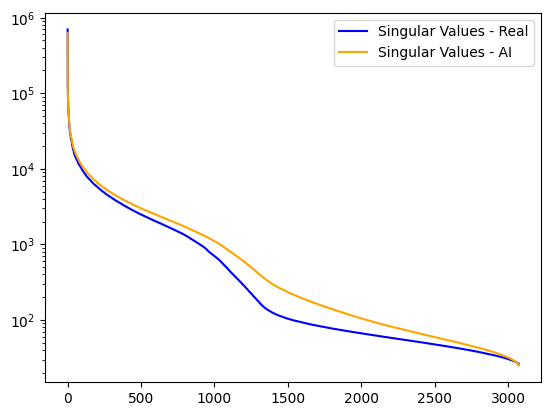

In [3]:
plt.plot(S_real, color='blue', label = "Singular Values - Real") # Plot
plt.plot(S_fake, color='orange', label = "Singular Values - AI")
plt.semilogy()
plt.legend()

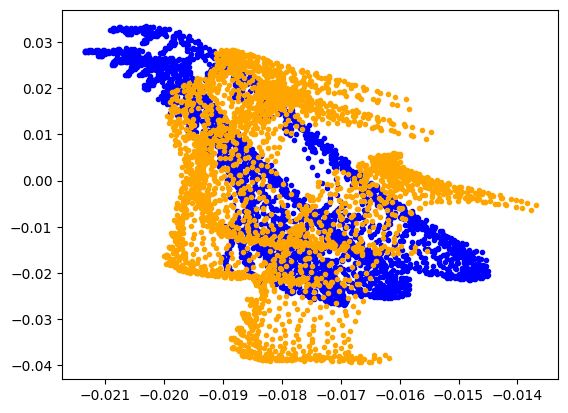

In [22]:
import matplotlib.pyplot as plt 


%matplotlib inline

x_real = (V_real)[0]
y_real = (V_real)[1]
z_real = V_real[2]
fig = plt.figure()
xyz = fig.add_subplot(111)
scatter1 = xyz.scatter(x_real, y_real, marker='.', color='blue')

x_fake = V_fake[0]
y_fake = V_fake[1]
scatter2 = xyz.scatter(x_fake, y_fake, marker='.', color='orange')
plt.show()


In [9]:

real_dir = "cifake/test/REAL/" 
fake_dir = "cifake/test/FAKE/" 
# Extract and save
extract_features(real_dir, "real_features_test.npy")
extract_features(fake_dir, "fake_features_test.npy")

100%|██████████| 1000/1000 [00:00<00:00, 8398.00it/s]


✅ Saved (1000, 32, 32, 3) to real_features_test.npy


100%|██████████| 1000/1000 [00:00<00:00, 9607.78it/s]

✅ Saved (1000, 32, 32, 3) to fake_features_test.npy


In [19]:
from random import shuffle
real_test = np.load("real_features_test.npy")
fake_test = np.load("fake_features_test.npy")
real_test = np.array([item.flatten() for item in real_test]) #  Flatten the data appropriately
fake_test = np.array([item.flatten() for item in fake_test]) 
print(real_test.shape)
a = [real_test, fake_test]
shuffle(a)
U_1, S_1, V_1 = np.linalg.svd(real_test, full_matrices=False) # Compute svd of 1 data
U_2, S_2, V_2 = np.linalg.svd(fake_test, full_matrices=False) # Compute svd of AI data

(1000, 3072)


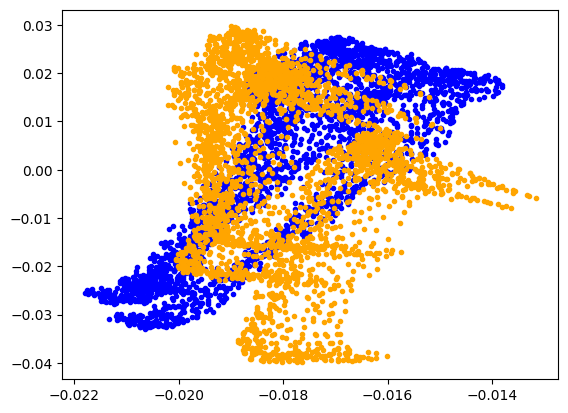

In [21]:
fig = plt.figure()
xyz = fig.add_subplot(111)
x = V_1[0]
y = V_1[1]
z = V_1[2]
scatter2 = xyz.scatter(x, y, marker='.', color='blue')

x = V_2[0]
y = V_2[1]
z = V_2[2]
scatter2 = xyz.scatter(x, y, marker='.', color='orange')
plt.show()
plt.show()

## SVD Method with ResNet18 Features

In [23]:

# Load the features you previously extracted with ResNet18
m = 10
real_feats_list = np.array([np.load("real_features_" + str(i).zfill(2) +  ".npy") for i in range(1, m+1)])
fake_feats_list = np.array([np.load("fake_features_" + str(i).zfill(2) +  ".npy") for i in range(1, m+1)])

# Combine the three datasets into one

real_feats = np.concatenate(real_feats_list)
fake_feats = np.concatenate(fake_feats_list)


In [25]:
U_1, S_1, V_1 = np.linalg.svd(real_feats, full_matrices=False) # Compute svd of real data
U_2, S_2, V_2 = np.linalg.svd(fake_feats, full_matrices=False) # Compute svd of AI data

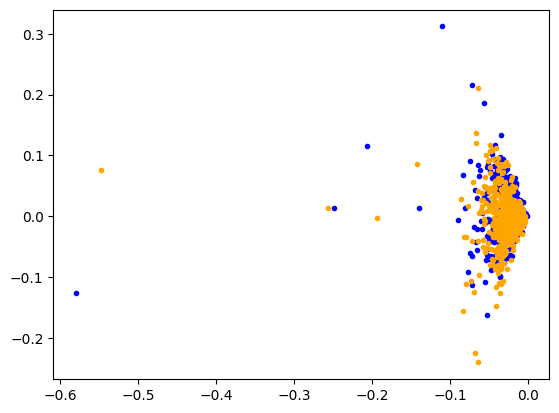

In [30]:

fig = plt.figure()
xyz = fig.add_subplot(111)
x = V_1[0]
y = V_1[1]
z = V_1[2]
scatter2 = xyz.scatter(x, y, marker='.', color='blue')

x = V_2[0]
y = V_2[1]
z = V_2[2]
scatter2 = xyz.scatter(x, y, marker='.', color='orange')
plt.show()

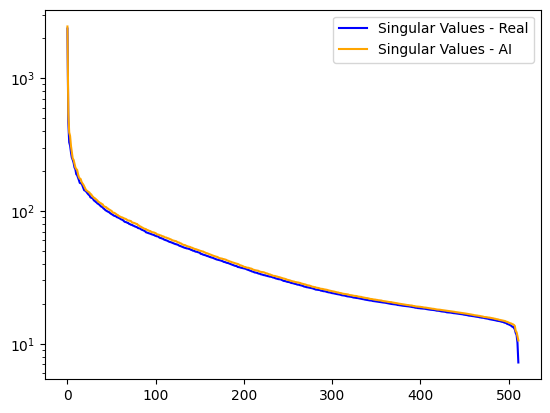

In [31]:

plt.plot(S_1, color='blue', label = "Singular Values - Real") # Plot
plt.plot(S_2, color='orange', label = "Singular Values - AI")
plt.semilogy()
plt.legend()